In [15]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf

from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [16]:
train_data=pd.read_csv('../LP-IV-datasets/MNIST/mnist_train.csv')
x_train=train_data.drop('label',axis=1).values
y_train=train_data['label'].values

In [17]:
test_data=pd.read_csv('../LP-IV-datasets/MNIST/mnist_test.csv')
x_test=test_data.drop('label',axis=1).values
y_test=test_data['label'].values

In [18]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=x_train.reshape((-1,28,28,1))
x_test=x_test.reshape((-1,28,28,1))

In [19]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [21]:
model=Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2),
    Flatten(),
    Dense(128,activation='relu'),Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1466 - accuracy: 0.9574 - val_loss: 0.0568 - val_accuracy: 0.9818
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0509 - val_accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0384 - val_accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0442 - val_accuracy: 0.9856


In [23]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9856


313/313 [==============================] - 1s 3ms/step
3
3


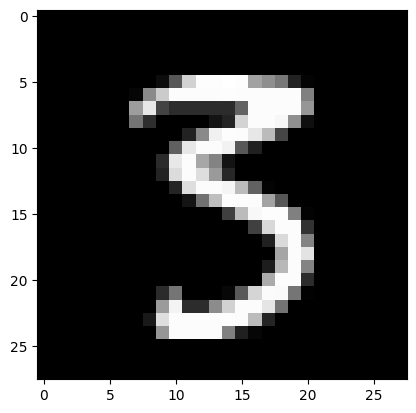

In [28]:
import matplotlib.pyplot as plt

import random 
n=random.randint(0,9999)
plt.imshow(x_test[n].reshape(28,28,),cmap='gray')
predict=model.predict(x_test)
print(np.argmax(y_test[n]))
print(np.argmax(predict[n]))